## 💥1. Introduction

This report analyzes worldwide economic data at the country level. The goal is to explore key indicators and trends that provide insights into the overall state of the global economy.




###

## 📂2. Loading the Dataset

To begin, we import the pandas library and read the worldwide economic dataset (CSV file) into a DataFrame for analysis.

In [13]:
import pandas as pd


df = pd.read_csv(r"C:\World Economic Dataset\World_Economic_Dataset.csv")

#####

To ensure the dataset was loaded successfully, we quickly inspect the first 5 rows of the dataset.

In [14]:
df.head()

,name,currency,capital,languages,latitude,longitude,area,region,subregion,borders,GDP,GDP Growth,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
0,Tunisia,Tunisian dinar,Tunis,Arabic,34.000000,9.000000,163610.0,Africa,Northern Africa,"['DZA', 'LBY']",53,1.80,7.5,5.30,15.70,-6.6,79.8,-2.7,11.89
1,Vietnam,Vietnamese đồng,Hanoi,Vietnamese,16.166667,107.833333,331212.0,Asia,South-Eastern Asia,"['KHM', 'CHN', 'LAO']",476,6.88,4.5,3.19,2.24,-4.0,32.9,6.1,101.30
2,Ecuador,United States dollar,Quito,Spanish,-2.000000,-77.500000,276841.0,Americas,South America,"['COL', 'PER']",125,3.46,8.5,0.72,4.50,-1.9,50.6,2.8,17.97
3,Puerto Rico,United States dollar,San Juan,English,18.250000,-66.500000,8870.0,Americas,Caribbean,NaN,126,NaN,NaN,1.20,5.70,NaN,NaN,NaN,3.20
4,United States,United States dollar,"Washington, D.C.",English,38.000000,-97.000000,9372610.0,Americas,North America,"['CAN', 'MEX']",29185,3.00,4.5,2.70,4.20,-6.4,124.3,-3.9,341.15


###

## 🔍3. Overview of the data

Before starting the cleaning step, we take a quick overview of the dataset, including column names, data types, non-null counts and basic descriptive statistics.

In [15]:
df.info()


df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             173 non-null    object 
 1   currency         173 non-null    object 
 2   capital          172 non-null    object 
 3   languages        173 non-null    object 
 4   latitude         173 non-null    float64
 5   longitude        173 non-null    float64
 6   area             173 non-null    float64
 7   region           173 non-null    object 
 8   subregion        173 non-null    object 
 9   borders          149 non-null    object 
 10  GDP              173 non-null    int64  
 11  GDP Growth       101 non-null    float64
 12  Interest Rate    162 non-null    float64
 13  Inflation Rate   172 non-null    float64
 14  Jobless Rate     171 non-null    float64
 15  Gov. Budget      166 non-null    float64
 16  Debt/GDP         165 non-null    float64
 17  Current Account 

,latitude,longitude,area,GDP,GDP Growth,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
count,173.000000,173.000000,1.730000e+02,173.000000,101.000000,162.000000,172.000000,171.000000,166.000000,165.000000,167.000000,173.000000
mean,20.437142,22.371774,7.561437e+05,637.508671,1.115644,7.802222,8.348663,7.363099,-2.822831,60.945879,-0.545269,45.570058
std,23.961270,58.849734,2.007481e+06,2703.930867,3.820764,8.169314,21.367006,6.065999,4.265735,38.998840,8.871213,155.896870
min,-41.000000,-102.000000,2.020000e+00,2.000000,-23.700000,0.000000,-9.100000,0.100000,-17.600000,2.300000,-31.500000,0.040000
25%,6.500000,-2.000000,3.839400e+04,20.000000,0.100000,2.812500,1.275000,3.200000,-4.975000,36.100000,-4.900000,3.540000
50%,20.000000,24.000000,1.810350e+05,72.000000,0.700000,5.250000,3.350000,5.200000,-3.175000,54.900000,-1.000000,10.580000
75%,40.000000,49.000000,5.870410e+05,373.000000,1.800000,9.187500,5.300000,9.115000,-1.100000,76.500000,3.210000,34.430000
max,65.000000,178.065000,1.709824e+07,29185.000000,18.600000,59.230000,172.000000,33.200000,21.600000,272.000000,31.400000,1408.000000


#####

We also check for missing values in each column to identify potential data quality issues.

In [16]:
df.isna().sum()

name                0
currency            0
capital             1
languages           0
latitude            0
longitude           0
area                0
region              0
subregion           0
borders            24
GDP                 0
GDP Growth         72
Interest Rate      11
Inflation Rate      1
Jobless Rate        2
Gov. Budget         7
Debt/GDP            8
Current Account     6
Population          0
dtype: int64

###

## 🧹4. Cleaning the data

Now we will go through some cleaning step to prepare the dataset for analysis. We start by standardizing column names and text values for consistency. Next, nuymeric columns are converted to proper numeric types, ensuring calculations can be performed reliably. Finally, duplicate rows and entries missing key data such as 'gdp' and 'population' are removed to maintain data quality.

In [17]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.title()

numeric_cols = [
    'latitude', 'longitude', 'area', 'gdp', 'gdp_growth', 'interest_rate', 'inflation_rate', 'jobless_rate',
    'gov._budget', 'debt/gdp', 'current_account', 'population'
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.drop_duplicates()

df = df.dropna(subset=['gdp', 'population'])

###

## 📊5. Exploratory Data Analysis with Visualization

We first load necessary libraries for data visualization.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

#####

To better understand economic differences between countries, we calculated GDP per capita by dividing each country's GDP by its population. We then visualized its distribution, using a histogram which shows how countries are spread across different GDP per capita ranges.

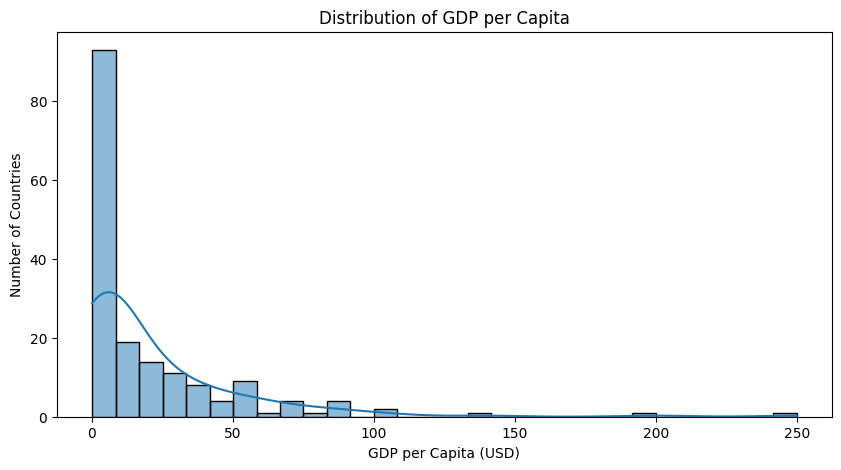

In [19]:
df['gdp_per_capita'] = df['gdp'] / df['population']
plt.figure(figsize=(10,5))
sns.histplot(df['gdp_per_capita'], bins=30, kde=True)
plt.title("Distribution of GDP per Capita")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Number of Countries")
plt.show()

#####

We will now visualize the distribution of GDP across countries, using a histogram. The number of countries in each GDP range is shown on the y-axis, allowing us to see how many countries have low, medium, or high GDP levels. The KDE curve provides a smoothed view of the overal distribution.

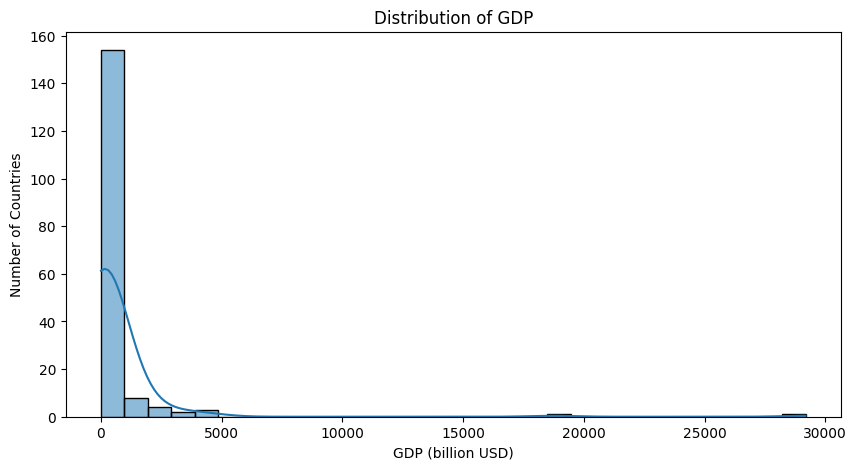

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df['gdp'], bins=30, kde=True)
plt.title("Distribution of GDP")
plt.xlabel("GDP (billion USD)")
plt.ylabel("Number of Countries")
plt.show()

#####

The following scatter plot compares GDP and population for each country with points, coloured by region (continent). It helps identify trends and outliers, showing whether countries with larger populations also tend to have higher GDP and how regions differ in their economic sizes.

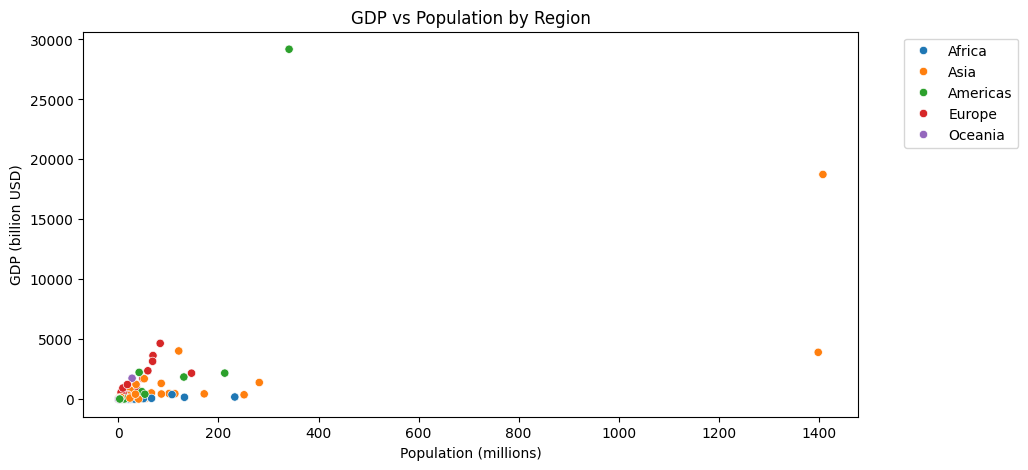

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='population', y='gdp', data=df, hue='region')
plt.title("GDP vs Population by Region")
plt.xlabel("Population (millions)")
plt.ylabel("GDP (billion USD)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#####

This heatmap below shows the correlation coefficients between key numeric economic indicators. Values close to 1 or -1 indicate strong positive or negative relationships respectively, providing insight into which variables are closely related and may influence each other.

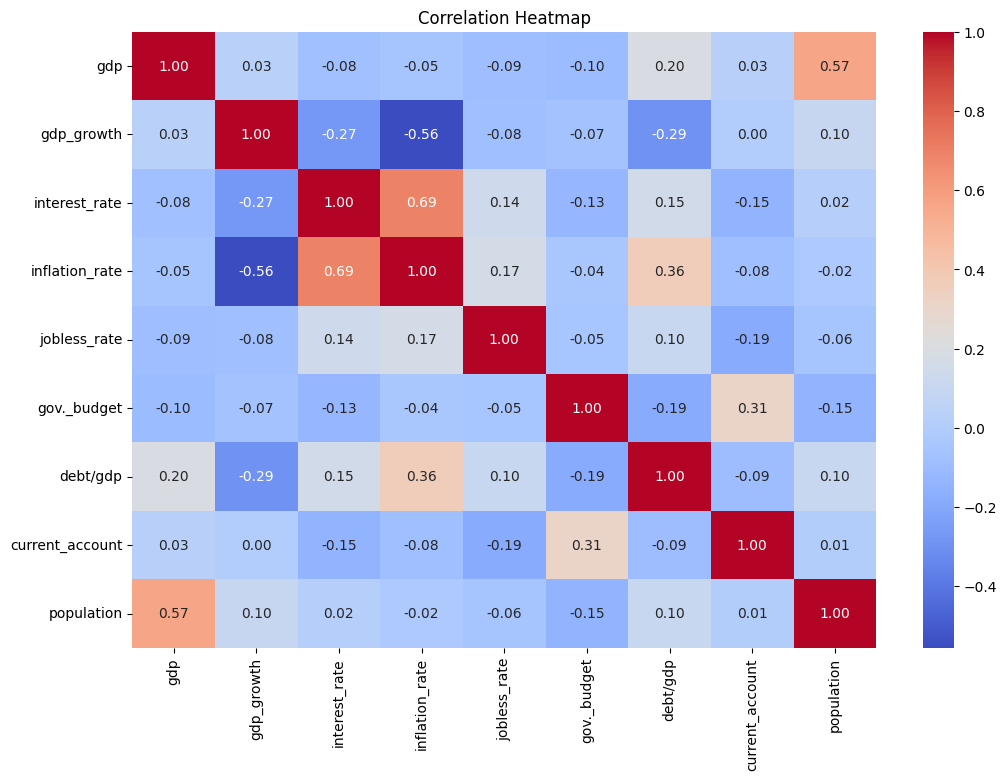

In [22]:
plt.figure(figsize=(12,8))
corr = df[['gdp','gdp_growth','interest_rate','inflation_rate','jobless_rate','gov._budget','debt/gdp','current_account','population']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#####

The horizontal bar chart highlights the top 10 countries by GDP. It allows quick comparison of the largest economies, showing the relative size of each country's GDP in billions of USD.

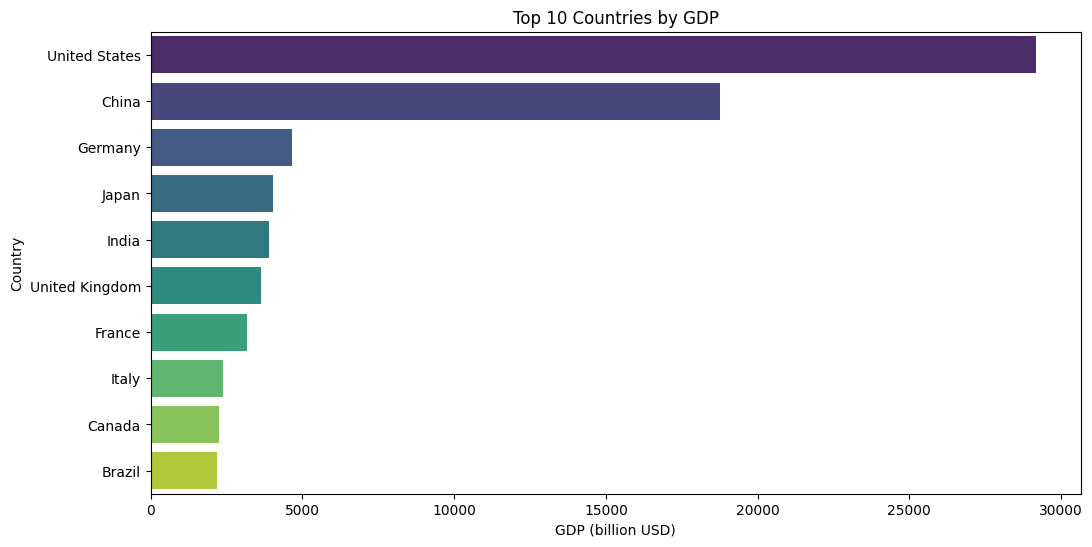

In [23]:
top_gdp = df[['name','gdp']].sort_values(by='gdp', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='gdp', y='name', data=top_gdp, hue = 'name', palette='viridis')
plt.title("Top 10 Countries by GDP")
plt.xlabel("GDP (billion USD)")
plt.ylabel("Country")
plt.show()

#####

The boxplot shows the distribution of population across different regions (continents). The boxes represent the interquartile range and median for each region while the whiskers indicate variability and potential outliers. It helps compare population spreads and identify regions with extreme population values.

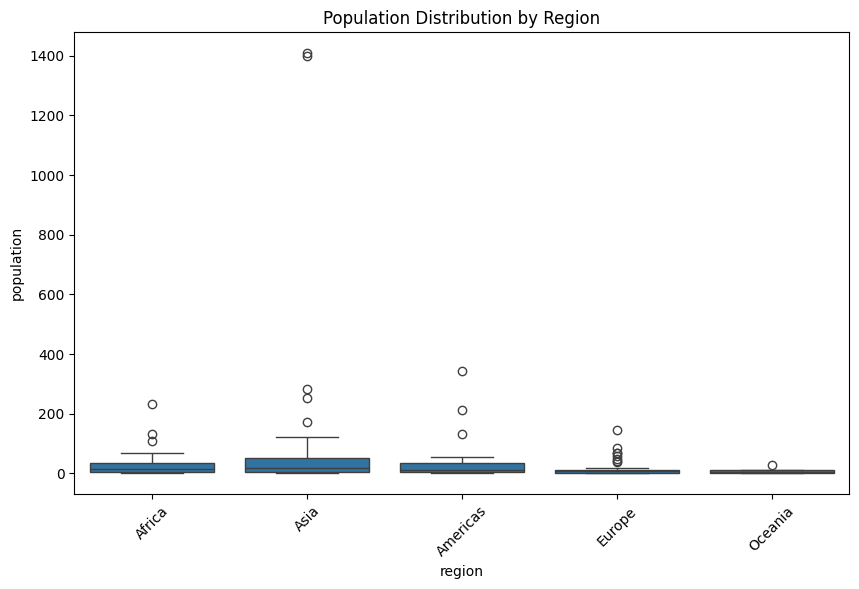

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='region', y='population', data=df)
plt.title("Population Distribution by Region")
plt.xticks(rotation=45)
plt.show()

###

## 📌6. Conclusion

* Global GDP: A few countries dominate global output while most have much smaller economies.
* GDP per Capita: Highlights inequality as high GDP does not always mean high living standards.
* Population & GDP: Larger populations often align with higher GDP, though regional (continental) differences are clear.
* Key Indicators: Correlation analysis shows meaningful links between growth, inflation and unemployment.
 
  
 
💬 Personal Review: The analysis highlights the uneven distribution of economic power and living standards across countries. GDP alone does not fully capture economic well-being. Examining GDP per capita and other indicators such as unemployment and inflation provides deeper insights. Overall, the project improved my understanding of global economic patterns and how different indicators interact to shape the wolrd economy.